In [11]:
%matplotlib inline

import json
Settings = json.load(open('../settings.txt'))
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
from cselect import color as cs
import sys
sys.path.insert(0,'../')
sys.path.insert(0,'../samples')
from mvpose.data import epfl_campus
from time import time

root = Settings['data_root']
root = join(root, 'pak')
tmp = Settings['tmp']

import mvpose.data.kth_football2 as kth
from mvpose import pose
from mvpose.settings import get_settings
from paf_loader import Loader
from mvpose.evaluation import pcp

loader = Loader()

# ----------------------------
# def extract_best_kth(pos3d, Humans):
#     """
#         Extracts the best fitting human for the calculation
#     """
#     alpha = 0.5
#     larms = 0
#     uarms = 0
#     ulegs = 0
#     llegs = 0
#     all_parts = 0
    
#     for h in Humans:
#         r = pcp.evaluate(pos3d, Humans[0], alpha)
#         if all_parts < r.all_parts:
#             larms = r.lower_arms
#             uarms = r.upper_arms
#             ulegs = r.upper_legs
#             llegs = r.lower_legs
    
#     return np.mean([larms, uarms, ulegs, llegs])

def generate_pcp_score_campus(frame, params):
    alpha = 0.5
    
    Im, Y, Calib = epfl_campus.get(root, frame)
    heatmaps, pafs = loader.load_confidence_map_and_paf(
        'campus', Im, frame, dir=Settings['tmp'])
    detections = pose.estimate(Calib, heatmaps, pafs, 
                               settings=params, debug=False)
    #detections = gen.apply(detections)
    Humans = kth.transform3d_from_mscoco(detections)
    
    L_Arms = []
    U_Arms = []
    L_Legs = []
    U_Legs = []
  
    for gtid, gt in enumerate(Y):
        if gt is None:
            continue
        
        larms = 0
        uarms = 0
        llegs = 0
        ulegs = 0
        avg = 0
        for d in Humans:
            r = pcp.evaluate(gt, d, alpha)
            larms_ = r.lower_arms
            uarms_ = r.upper_arms
            ulegs_ = r.upper_legs
            llegs_ = r.lower_legs
            avg_ = (larms_ + uarms_ + ulegs_ + llegs_) / 4
            if avg_ > avg:
                avg = avg_
                larms = larms_
                uarms = uarms_
                llegs = llegs_
                ulegs = ulegs_
        
        L_Arms.append(larms)
        U_Arms.append(uarms)
        L_Legs.append(llegs)
        U_Legs.append(ulegs)
    
    if len(L_Arms) == 0:
        return 0
    
    larms = np.mean(L_Arms)
    uarms = np.mean(U_Arms)
    llegs = np.mean(L_Legs)
    ulegs = np.mean(U_Legs)
    
    
    return np.mean([larms, uarms, llegs, ulegs])


# ----------------------------


# --------------------------
# params = get_settings(scale_to_mm=1000,
#                       hm_detection_threshold=0.05,
#                       pp_conflict_overlap=0.4,
#                       min_joint_distance=20,
#                       gp_max_radius=300,
#                       ms_radius=30,
#                       ms_between_distance=60)
# --------------------------


#ms_radius = [10, 20, 30, 50, 60, 70, 90, 100, 120, 150, 170, 200, 250]
#ms_radius = [240, 260, 270, 280, 300]
#ms_radius = [420, 440, 460, 480, 500]
ms_radius =[340, 360]
ms_radius_results_up_till_250 = [
    0.8977272727272727, 0.8977272727272727, 0.8988636363636363, 
    0.8985795454545454, 0.897159090909091, 0.8979166666666666, 
    0.897159090909091, 0.8946022727272728, 0.8956439393939393, 
    0.8975378787878787, 0.8970643939393939, 0.890435606060606, 
    0.9014204545454545]
ms_radius_results_from_250_till_300 = [
    0.9034090909090909, 0.8985795454545454, 
    0.8980113636363637, 0.8991477272727273, 0.8958333333333333
]
ms_radius_results_from_420_til_500 = [
    0.8981060606060607, 0.8965909090909091, 0.8949810606060606, 
    0.8934659090909091, 0.8913825757575757
]

# ms_radius_results = ms_radius_results_up_till_250 +\
#     ms_radius_results_from_250_till_300
ms_radius_results = []

# ====== RADIUS =======
for ms in ms_radius:
    print('\nms radius ', ms)
    _start = time()
    params = get_settings(scale_to_mm=1000,
                      hm_detection_threshold=0.05,
                      pp_conflict_overlap=0.4,
                      min_joint_distance=20,
                      gp_max_radius=300,
                      ms_radius=ms,
                      ms_between_distance=60)
    
    valid_frames = list(range(350, 470)) + list(range(650, 750))
    #valid_frames = [350, 351, 352]
    scores = []
    for frame in valid_frames:
        score = generate_pcp_score_campus(frame, params)
        scores.append(score)
    ms_radius_results.append(np.mean(scores))
    _end = time()
    print('\telapsed', _end - _start)
    print('\tresult:', np.mean(scores))
    print('')

print('\nms_radius_results', ms_radius_results)
print('\n')


ms radius  340
	elapsed 265.25350856781006
	result: 0.8996212121212122


ms radius  360
	elapsed 361.78891944885254
	result: 0.9013257575757576


ms_radius_results [0.8996212121212122, 0.9013257575757576]




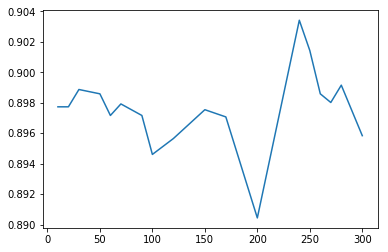

In [9]:
ms_radius = [10, 20, 30, 50, 60, 70, 90, 100, 120, 150, 170, 200, 240]+\
    [250, 260, 270, 280, 300]
ms_radius_results_up_till_250 = [
    0.8977272727272727, 0.8977272727272727, 0.8988636363636363, 
    0.8985795454545454, 0.897159090909091, 0.8979166666666666, 
    0.897159090909091, 0.8946022727272728, 0.8956439393939393, 
    0.8975378787878787, 0.8970643939393939, 0.890435606060606, 
    0.9034090909090909]
ms_radius_results_from_250_till_300 = [
    0.9014204545454545, 0.8985795454545454, 
    0.8980113636363637, 0.8991477272727273, 0.8958333333333333
]
ms_radius_results = ms_radius_results_up_till_250 +\
    ms_radius_results_from_250_till_300

plt.plot(ms_radius, ms_radius_results)
plt.show()

In [2]:
# ====== DETECTION THRESHOLD =======

hm_detection_thresholds = [0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4]
hm_detection_thresholds_results = []

for th in hm_detection_thresholds:
    print('\nms detection threshold ', th)
    _start = time()
    params = get_settings(scale_to_mm=1000,
                      hm_detection_threshold=th,
                      pp_conflict_overlap=0.4,
                      min_joint_distance=20,
                      gp_max_radius=300,
                      ms_radius=60,
                      ms_between_distance=60)
    
    valid_frames = list(range(350, 470)) + list(range(650, 750))
    #valid_frames = [350, 351]
    scores = []
    for frame in valid_frames:
        score = generate_pcp_score_campus(frame, params)
        scores.append(score)
    hm_detection_thresholds_results.append(np.mean(scores))
    _end = time()
    print('\telapsed', _end - _start)

print('\nhm_detection_thresholds', hm_detection_thresholds_results)
print('\n')


ms detection threshold  0.01
	elapsed 415.6275088787079

ms detection threshold  0.03
	elapsed 330.39329504966736

ms detection threshold  0.05
	elapsed 331.6221332550049

ms detection threshold  0.1
	elapsed 308.6344356536865

ms detection threshold  0.2
	elapsed 305.31451535224915

ms detection threshold  0.3
	elapsed 324.6778905391693

ms detection threshold  0.4
	elapsed 351.41912364959717

hm_detection_thresholds [0.8565340909090909, 0.899715909090909, 0.897159090909091, 0.8886363636363637, 0.8552083333333333, 0.8259469696969696, 0.7928977272727272]




In [3]:
# ====== CONFLICT =======

pp_conflict_overlap = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.9]
pp_conflict_overlap_results = []

for th in pp_conflict_overlap:
    print('\nms conflict overlap ', th)
    _start = time()
    params = get_settings(scale_to_mm=1000,
                      hm_detection_threshold=0.05,
                      pp_conflict_overlap=th,
                      min_joint_distance=20,
                      gp_max_radius=300,
                      ms_radius=60,
                      ms_between_distance=60)
    
    valid_frames = list(range(350, 470)) + list(range(650, 750))
    #valid_frames = [350, 351]
    scores = []
    for frame in valid_frames:
        score = generate_pcp_score_campus(frame, params)
        scores.append(score)
    pp_conflict_overlap_results.append(np.mean(scores))
    _end = time()
    print('\telapsed', _end - _start)

print('\npp_conflict_overlap', pp_conflict_overlap_results)
print('\n')


ms conflict overlap  0.1
	elapsed 322.4433162212372

ms conflict overlap  0.2
	elapsed 290.10185718536377

ms conflict overlap  0.3
	elapsed 284.9612121582031

ms conflict overlap  0.4
	elapsed 284.165874004364

ms conflict overlap  0.5
	elapsed 327.9575409889221

ms conflict overlap  0.6
	elapsed 293.5313582420349

ms conflict overlap  0.9
	elapsed 335.68990421295166

pp_conflict_overlap [0.884280303030303, 0.8922348484848485, 0.8948863636363636, 0.897159090909091, 0.897159090909091, 0.897159090909091, 0.8773674242424242]




In [4]:
# ====== epidistance =======

max_epi_distance = [1, 5, 10, 15, 20, 50, 100]
max_epi_distance_results = []

for epi in max_epi_distance:
    print('\nms epi distance ', epi)
    _start = time()
    params = get_settings(scale_to_mm=1000,
                      hm_detection_threshold=0.05,
                      pp_conflict_overlap=0.4,
                      max_epi_distance=epi,
                      min_joint_distance=20,
                      gp_max_radius=300,
                      ms_radius=60,
                      ms_between_distance=60)
    
    valid_frames = list(range(350, 470)) + list(range(650, 750))
    #valid_frames = [350, 351]
    scores = []
    for frame in valid_frames:
        score = generate_pcp_score_campus(frame, params)
        scores.append(score)
    max_epi_distance_results.append(np.mean(scores))
    _end = time()
    print('\telapsed', _end - _start)

print('\nepidistance', max_epi_distance_results)
print('\n')


ms epi distance  1
	elapsed 285.56570625305176

ms epi distance  5
	elapsed 441.44965839385986

ms epi distance  10
	elapsed 486.4424135684967

ms epi distance  15
	elapsed 431.8559322357178

ms epi distance  20
	elapsed 607.5849878787994

ms epi distance  50
	elapsed 513.1860575675964

ms epi distance  100
	elapsed 627.3872213363647

epidistance [0.21704545454545454, 0.8892045454545454, 0.897159090909091, 0.890435606060606, 0.8722537878787879, 0.8640151515151514, 0.8640151515151514]




In [13]:
# ====== min joint distance =======

# 1, 5, 10, 15, 20, 50, 100
min_joint_distance = [150, 200, 500]
min_joint_distance_results = []

for d in min_joint_distance:
    print('\nms min joint distance ', d)
    _start = time()
    params = get_settings(scale_to_mm=1000,
                      hm_detection_threshold=0.05,
                      pp_conflict_overlap=0.4,
                      max_epi_distance=10,
                      min_joint_distance=d,
                      gp_max_radius=300,
                      ms_radius=60,
                      ms_between_distance=60)
    
    valid_frames = list(range(350, 470)) + list(range(650, 750))
    #valid_frames = [350, 351]
    scores = []
    for frame in valid_frames:
        score = generate_pcp_score_campus(frame, params)
        scores.append(score)
    min_joint_distance_results.append(np.mean(scores))
    _end = time()
    print('\telapsed', _end - _start)

print('\nepidistance', min_joint_distance_results)
print('\n')


ms min joint distance  100
	elapsed 439.510137796402

ms min joint distance  100
	elapsed 426.28326296806335

ms min joint distance  100
	elapsed 399.8327317237854

epidistance [0.8174242424242424, 0.34867424242424244, 0.0]


